# Timeseries CPD with Ruptures Adapter and Comparison with ClaSP



## Prerequisites

In [7]:
import time

from sktime.annotation.adapters._ruptures import (
    RupturesBinsegCPD,
    RupturesKernelCPD,
    RupturesWindowCPD,
)
from sktime.annotation.clasp import ClaSPSegmentation, find_dominant_window_sizes
from sktime.annotation.plotting.utils import plot_time_series_with_change_points
from sktime.datasets import load_electric_devices_segmentation

The following use case shows an energy profile of electric household devices with four change points indicating different operational states or plugged household devices.

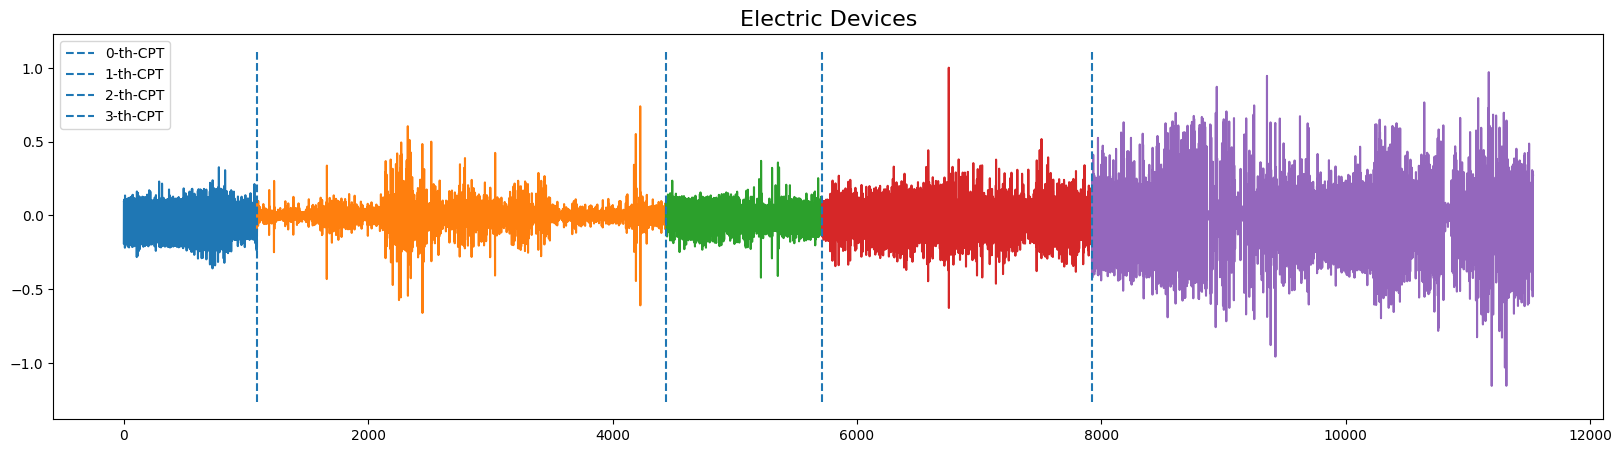

In [2]:
ts, period_size, true_cps = load_electric_devices_segmentation()
_ = plot_time_series_with_change_points("Electric Devices", ts, true_cps)

The annotated change points are around time stamps $[1090,4436,5712,7923]$, from which different electric devices are recorded.

## Kernel-based Change Point Detection with Ruptures

[1092, 4464, 5780, 7923, 11532]
Running time: 10.058196306228638 seconds
True


(<Figure size 2000x500 with 1 Axes>,
 <Axes: title={'center': 'Result with Ruptures'}>)

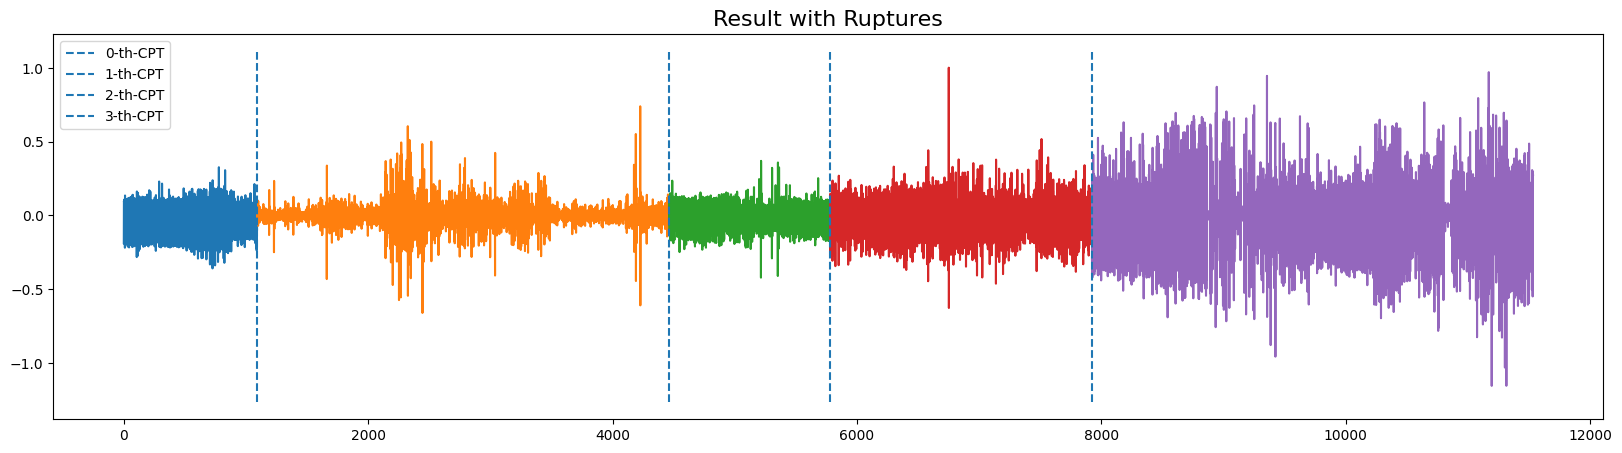

In [3]:
start_time: float = time.time()

cpd = RupturesKernelCPD(kernel="rbf", n_cps=4)
# print(ts.values.shape)
found_cps = cpd.fit_predict(ts.values)
print(found_cps)

end_time = time.time()
print("Running time: {} seconds".format(end_time - start_time))

print(len(ts.values) == found_cps[-1])  # found_cps[-1] is the last index of ts
plot_time_series_with_change_points("Result with Ruptures", ts, found_cps[:-1])

In [9]:
start_time: float = time.time()

binseg_cpd = RupturesBinsegCPD(model="rank", n_cps=4)
# print(ts.values.shape)
found_cps = binseg_cpd.fit_predict(ts.values)
print(found_cps)

end_time = time.time()
print("Running time: {} seconds".format(end_time - start_time))

print(len(ts.values) == found_cps[-1])  # found_cps[-1] is the last index of ts
plot_time_series_with_change_points("Result with Ruptures", ts, found_cps[:-1])

In [6]:
start_time: float = time.time()

window_cpd = RupturesWindowCPD(width=100, model="normal", n_cps=4)
# print(ts.values.shape)
found_cps = window_cpd.fit_predict(ts.values)
print(found_cps)

end_time = time.time()
print("Running time: {} seconds".format(end_time - start_time))

print(len(ts.values) == found_cps[-1])  # found_cps[-1] is the last index of ts
plot_time_series_with_change_points("Result with Ruptures", ts, found_cps[:-1])

TypeError: RupturesWindowCPD.__init__() got an unexpected keyword argument 'model'

## Comparison with ClaSP

In [ ]:
dominant_period_size = find_dominant_window_sizes(ts)
print("Dominant Period", dominant_period_size)

Dominant Period 10


In [ ]:
start_time = time.time()

clasp = ClaSPSegmentation(period_length=dominant_period_size, n_cps=5)
found_cps = clasp.fit_predict(ts)
print(found_cps)

end_time = time.time()
print("Running time: {} seconds".format(end_time - start_time))

0    1038
1    4525
2    5719
3    7883
dtype: int64
Running time: 16.696955680847168 seconds


(<Figure size 2000x500 with 1 Axes>,
 <Axes: title={'center': 'Result with ClaSP'}>)

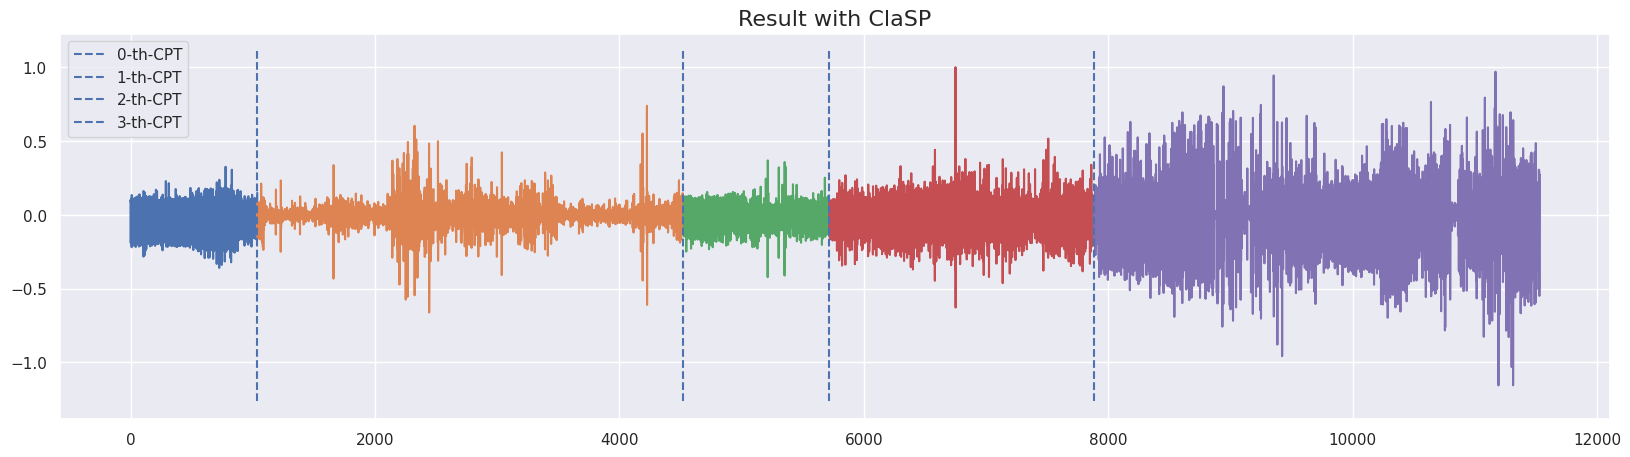

In [ ]:
plot_time_series_with_change_points("Result with ClaSP", ts, found_cps)